### EM-алгоритм (Expectation - Maximization)

<img src="https://i.ytimg.com/vi/REypj2sy_5U/hqdefault.jpg">

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190512202126/em11.jpg">

EM-алгоритм (англ. expectation-maximization) — это общий метод нахождения оценок функции правдоподобия в моделях со скрытыми переменными, который из смеси распределений позволяет строить (приближать) сложные вероятностные распределения.

EM-алгоритм в задачах кластеризации используется как итеративный алгоритм, который на каждой итерации осуществляет два шага:

E-шаг. На первом E-шаге мы каким-либо образом, например, случайным, выбираем скрытые переменные, в нашем случае это будут математическое ожидание — $\mu$ и стандартное отклонение — $\sigma$. Используя выбранные переменные, рассчитываем вероятность отнесения каждого объекта к тому или иному кластеру. При последующих E-шагах используются скрытые переменные, определенные на M-шагах.

M-шаг. На M-шаге мы, в соответствии с полученными на E-шаге значениями вероятностей отнесения каждого объекта к тому или иному кластеру, пересчитываем скрытые переменные $\mu$ и $\sigma$

### Пример 1: Вспоминая теорему Байеса

На складе хранится 10000 шт. деталей ($N = 10000$), которые производили два станка. Первый станок произвел 6000 шт. ($N_1 = 6000$), второй — 4000 шт. ($N_2 = 4000$). Доля брака на первом станке - 0.1, на втором - 0.2.

**Найти вероятность того, что случайно извлеченная деталь произведена на первом станке.**

*Решение:*

Пусть $P(A)$ - вероятность того, что деталь произведена на первом станке ($P(A) = N_1/N = 6000/10000 = 0.6$).

Тогда вероятность для второго станка $P(B)$ составляет $N_2/N = 0.4$.

Вероятность извлечь не бракованное изделие на первом станке (то есть, мы заранее знаем, что извлекаем из $P(A)$):

$P(A | x) = 1 - 0.1 = 0.9$, на втором — $P(B | x) = 1 - 0.2 = 0.8$.

Вероятность извлечь не бракованное изделие (на любом станке):
$P(x) = P(A) \cdot P(A | x) + P(B) \cdot P(B | x) = 0.6 \cdot 0.9 + 0.4 \cdot 0.8 = 0.54 + 0.32 = 0.86$.

Вероятность того, что случайно взятая деталь произведена на первом станке (теорема Байеса):

$$P(x | A) = \frac{P(A) \cdot P(A|x)}{P(x)} = \frac{0.6 \cdot 0.9}{0.86} \approx 0.63$$


### Пример 2: Используем статистику

На складе хранится 10000 шт. деталей ($N = 10000$), которые производили два станка. Первый станок произвел 6000 шт. ($N_1 = 6000$), второй — 4000 шт. ($N_2 = 4000$). Теперь мы не знаем долю брака на каждом станке, но зато появились данные о среднем диаметре деталей и об их стандартном отклонении:


Станок №1 производит детали размером 64 мм в диаметре и стандартным отклонением 4 мм ($\sigma_1 = 64, \mu_1 = 4$).

Станок №2 производит детали размером 52 мм в диаметре и стандартным отклонением в 2 мм ($\sigma_2 = 52, \mu_2 = 2$).

**Найти вероятность того, что случайно извлеченная деталь произведена на первом станке.**

*Решение:*

Вероятность того, что деталь с размерами диаметра $x$ произведена на станке №1 определим по формуле:

$$P(x|A) = \frac{P(A) \centerdot \rho (A | x)}{P(A) \centerdot \rho (A | x) + P(B) \centerdot \rho (B | x)},$$

$$\rho(A|x) = \frac{1}{\sigma_1 \centerdot \sqrt{2 \pi}} \centerdot \exp\left(- \frac{(x-\mu_1)^2}{2 \sigma_1^2}\right)$$

In [16]:
# импортируем библиотеки, модули
import numpy as np
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score

def gaus_func_01(mu,sigma,x):
    return math.e**(-(x-mu)**2/(2*sigma**2)) / (sigma*(2*math.pi)**0.5)

# напишем функцию определения вероятностей принадлежности деталей к станку
def proba_x(X, w1, w2, mu_1, mu_2, sigma_1, sigma_2):
    for i in X:
        P1_x = gaus_func_01(mu_1,sigma_1,i)
        P2_x = gaus_func_01(mu_2,sigma_2,i)
        P_x = w1*P1_x + w2*P2_x
        P_x_1 = (w1*P1_x)/P_x
        P_x_2 = (w2*P2_x)/P_x
        proba_temp = []
        proba_temp.append(P_x_1)
        proba_temp.append(P_x_2)
        proba_X.append(proba_temp)
    return proba_X

# напишем функцию отнесения изделия к тому или станку
def pred_x(proba_X, limit_proba):
    pred_X = []
    for x in proba_X:
        if x[0] >= limit_proba:
            pred_X.append(1)
        else:
            pred_X.append(2)
    return np.array(pred_X)

# напишем функцию построения графиков
def graph_01(X, pred_X, mu_1, sigma_1, mu_2, sigma_2):
    true_pred = []
    false_pred_1 = []
    false_pred_2 = []
    for i in range(X.shape[0]):
        if pred_X[i] == y[i]:
            true_pred.append([X[i], -0.025])
        else:
            if y[i] == 1:
                false_pred_1.append([X[i], -0.0075])
            else:
                false_pred_2.append([X[i], -0.015])

    false_pred_1 = np.array(false_pred_1)            
    false_pred_2 = np.array(false_pred_2)
    true_pred = np.array(true_pred)

    x_theory = np.linspace(42, 85, 20000)
    y_theory_1 = []
    for x in x_theory:
        y_theory_1.append(gaus_func_01(mu_1,sigma_1,x))
    y_theory_2 = []
    for x in x_theory:
        y_theory_2.append(gaus_func_01(mu_2,sigma_2,x))

    plt.figure(figsize=(18, 8))    
    plt.plot(
        x_theory, y_theory_1, color = 'green', lw = 2, label = 'Theoretical probability density for machine 1')
    plt.plot(
        x_theory, y_theory_2, color = 'firebrick', lw = 2, label = 'Theoretical probability density for machine 2')
    plt.hist(
        X[:N1], bins = 'auto', color='#539caf', density=True, alpha = 0.35, label = 'machine tool products 1')
    plt.hist(
        X[N1:N], bins = 'auto', color='sandybrown', density=True, alpha = 0.75, label = 'machine tool products 2')
    plt.plot(mu_1, 0, 'o', markersize = 11, color = 'blue', label = 'Mu 1')
    plt.plot(mu_2, 0, 'o', markersize = 11, color = 'red', label = 'Mu 2')

    plt.xlabel('Caliber')
    plt.ylabel('Probability density')
    plt.legend()
    plt.show()

Доля верно определенных изделий: 0.976


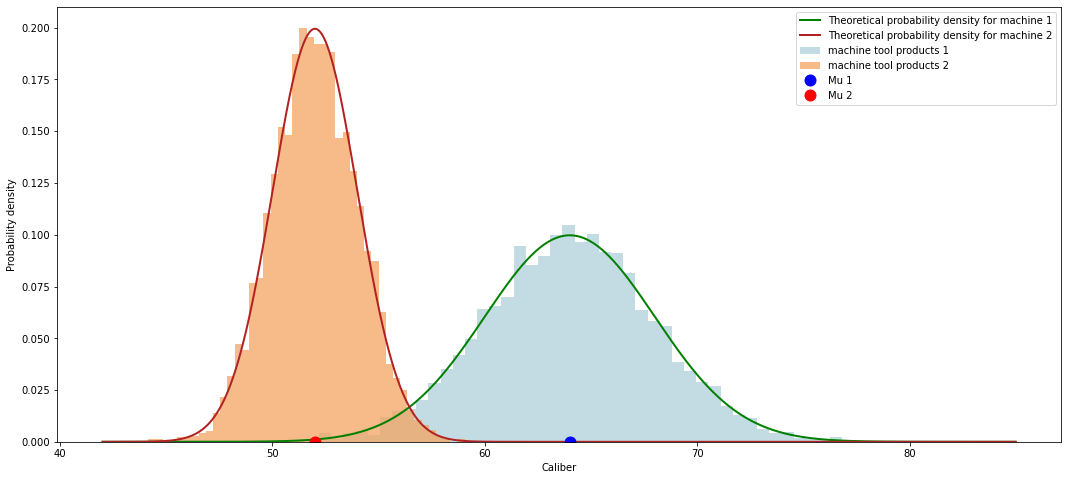

In [17]:
N1 = 6000
N2 = 4000
N = N1+N2

mu_1 = 64
sigma_1 = 4

mu_2 = 52
sigma_2 = 2.

X = np.zeros((N))
np.random.seed(seed=42)
# инициализируем данные по деталям, производства станка №1
X[:N1] = np.random.normal(loc=mu_1, scale=sigma_1, size=N1)
# инициализируем детали, производства станка №2
X[N1:N] = np.random.normal(loc=mu_2, scale=sigma_2, size=N2)

# инициализируем вектор ответов
y = np.zeros((N))
y[:N1] = np.array((1))
y[N1:N] = np.array((2))

# определим априорную вероятность извлечь изделие, произведенное на станке №1
w1 = float(N1)/N
# определим априорную вероятность извлечь изделие, произведенное на станке №2
w2 = float(N2)/N

# для каждой детали определим вероятность принадлежности к тому или иному станку
proba_X = []
proba_X = proba_x(X, w1, w2, mu_1, mu_2, sigma_1, sigma_2)

# установим порог вероятности, при достижении которого, изделие будет относиться к тому или иному станку
limit_proba = 0.5

# определим принадлежность детали к станку
pred_X = []
pred_X = pred_x(proba_X, limit_proba)

# определим качество нашего алгоритма
print ('Доля верно определенных изделий:', round(accuracy_score(y, pred_X),3))
graph_01(X, pred_X, mu_1, sigma_1, mu_2, sigma_2)

### Пример 3: Многомерный случай, типичная задача ML

Пускай теперь у деталь есть ещё один параметр (фича, если говорить на датасаенсовском).

Станок №1 производит детали диаметров 64 мм и отклонением 4 мм, а также весом в 12 г. и отклонением в 1 г.

Станок №2 производит детали диаметром 52 мм и отклонением в 2 мм, а также весом в 10 г. и отклонением 0.8 мм.


$N1 = 6000, \mu_{1 1} = 64, \sigma_{1 1} = 4, \mu_{1 2} = 14, \sigma_{1 2} = 1$

$N2 = 4000, \mu_{2 1} = 52, \sigma_{2 1} = 2, \mu_{2 2} = 10, \sigma_{2 2} = 0.9$

Для многомерного случая используется следующая формула ($k$ - количество наблюдений/объектов):

$$\rho(A|x) = \frac{1}{(2\pi)^{k/2} \centerdot \mid \Sigma_1\mid ^{1/2}} \centerdot \exp(- \frac{1}{2} \centerdot (x-\mu_1)^T \Sigma_1^{-1} (x-\mu_1))$$

Далее она подставляется в $P(x|A)$ из Примера 2, рассчитывается та же вероятность, но с другим функцоналом $\rho$ (многомерным)

In [18]:
# функция определения плотности вероятности извлечь деталь, произведенную на заданном станке
# то есть мы задаем параметры станка: мат.ожидание, среднее кв. отклонение
def gaus_func_02(k, m, x, mu, sigma):
    pj_xi = []
    for j in range(k):
        det_sigma_j = np.linalg.det(sigma[j])
        factor_1 = 1 / (((2 * math.pi)**(k/2)) * ((det_sigma_j)**0.5))
        factor_2 = []
        for i in x:
            factor_2.append(math.e**float(
            -0.5 * np.matrix(i - mu[j]) * np.matrix(np.linalg.inv(sigma[j])) * np.matrix(i - mu[j]).T))
        pj_xi.append(factor_1 * np.array(factor_2))
    return np.array(pj_xi)

# напишем функцию определения вероятности того, что извлеченный объект относится к кластеру №1 и №2
def proba_func_02(pjxi, w, k):
    # для начала определим вероятность извлечь объект из всей совокупности данных
    P_X = []
    for j in range(k):
        P_X.append(w[j] * pjxi[j])
    P_X = np.sum(np.array(P_X), axis = 0)
    # теперь определим вероятность того, что извлеченный объект относится к кластеру №1 и №2
    P_J_X = []
    for j in range(k):
        P_J_X.append(w[j] * pjxi[j] / P_X)
    return np.array(P_J_X)

# напишем функцию отнесения изделия к тому или станку
def pred_x_02(proba_X, limit_proba):
    pred_X = []
    for x in proba_X[0]:
        if x >= limit_proba:
            pred_X.append(1)
        else:
            pred_X.append(2)
    return np.array(pred_X)

# напишем функцию построения графика с распределением изделий по станкам в соответствии с алгоритмом
def graph_02_algorithm(pred_X, mu):
    # преобразуем массив данных
    pred_X = np.array(pred_X)

    # запишем параметры изделий, в раздельные массивы в соответствии с определением станка алгоритмом
    answers_1 = []
    answers_2 = []

    for i in range(pred_X.shape[0]):
        if pred_X[i] == 1:
            answers_1.append(X[i])
        else:
            answers_2.append(X[i])
    plt.figure(figsize=(16, 6))  
    plt.plot(
        np.array(answers_1)[:,0], np.array(answers_1)[:,1], 'o', alpha = 0.7, color='sandybrown', label = 'Produced on machine #1')
    plt.plot(
        np.array(answers_2)[:,0], np.array(answers_2)[:,1], 'o', alpha = 0.45, color = 'darkblue', label = 'Produced on machine #2')
    plt.plot(mu[0][0], mu[0][1], 'o', markersize = 16, color = 'red', label = 'Mu 1')
    plt.plot(mu[1][0], mu[1][1], 'o',  markersize = 16, color = 'slateblue', label = 'Mu 2')
    plt.xlabel('Diameter')
    plt.ylabel('Weight')
    plt.title("Model distribution")
    plt.legend()
    plt.show()
    
# напишем функцию построения графика с истинным распределением изделий по станкам
def graph_02_true(X, mu):
    plt.figure(figsize=(16, 6))  
    plt.plot(
        X[0:N1,0], X[0:N1,1], 'o', alpha = 0.7, color='sandybrown', label = 'Produced on machine #1')
    plt.plot(
        X[N1:N,0], X[N1:N,1], 'o', alpha = 0.45, color = 'darkblue', label = 'Produced on machine #2')
    plt.plot(mu[0][0], mu[0][1], 'o', markersize = 16, color = 'red', label = 'Mu 1')
    plt.plot(mu[1][0], mu[1][1], 'o',  markersize = 16, color = 'slateblue', label = 'Mu 2')
    plt.xlabel('Diameter')
    plt.ylabel('Weight')
    plt.title("True distribution")
    plt.legend()
    plt.show()

In [19]:
# количество станков
k = 2

N1 = 6000
N2 = 4000
N = N1+N2

m = 2

mu_1_1 = 64
mu_1_2 = 14
sigma_1_1 = 4
sigma_1_2 = 1.

mu_2_1 = 52
mu_2_2 = 10
sigma_2_1 = 2.
sigma_2_2 = 0.9

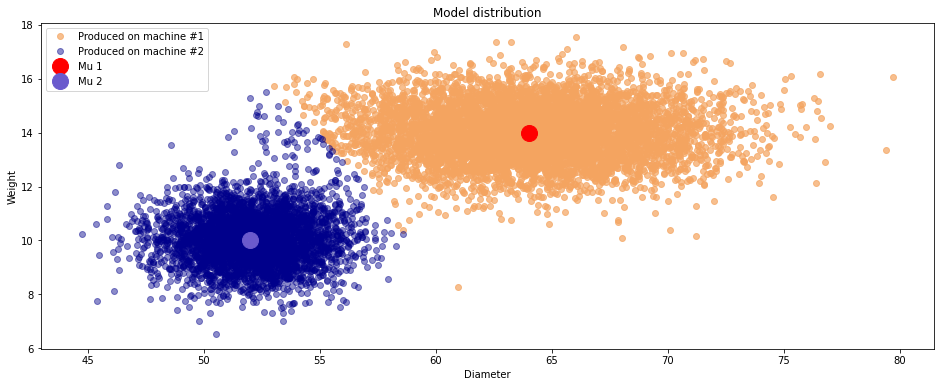

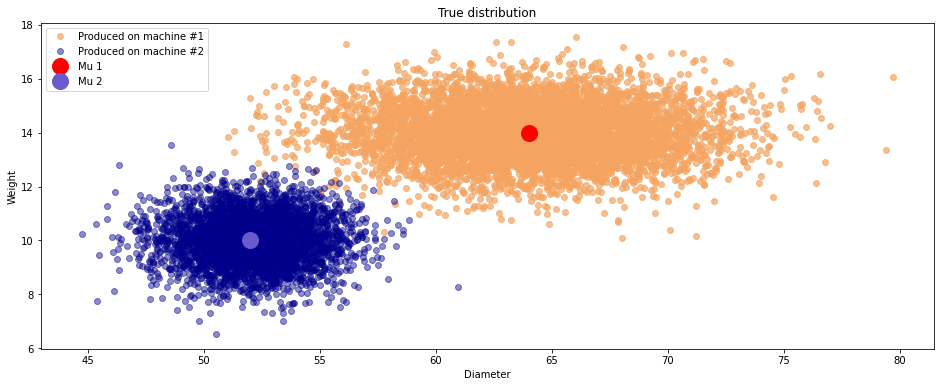

In [20]:
X = np.zeros((N, m))
np.random.seed(seed=42)
# инициализируем данные по деталям, производства станка №1
X[:N1, 0] = np.random.normal(loc=mu_1_1, scale=sigma_1_1, size=N1)
X[:N1, 1] = np.random.normal(loc=mu_1_2, scale=sigma_1_2, size=N1)
# инициализируем детали, производства станка №2
X[N1:N, 0] = np.random.normal(loc=mu_2_1, scale=sigma_2_1, size=N2)
X[N1:N, 1] = np.random.normal(loc=mu_2_2, scale=sigma_2_2, size=N2)

# зафиксируем правильные ответы (для оценки качества алгоритма, в обучении не используется)
y = np.zeros((N))
y[:N1] = np.array((1))
y[N1:N] = np.array((2))

# запишем средние значения диаметра и веса изделий в матричном формате (для удобства расчетов)
mu  = np.array(([mu_1_1, mu_1_2], [mu_2_1, mu_2_2]))

# запишем стандартные отклонения в формате матрицы ковариации (для удобства расчетов)
sigma = np.array(([sigma_1_1, 0.],[0., sigma_1_2], [sigma_2_1, 0.],[0., sigma_2_2]))
sigma = sigma.reshape(k, m, m)

# инициализируем априорную вероятность извлечь изделие, произведенное на станке №1 и №2
w = np.array([float(1./k), float(1./k)])

# запустим наши функции
pj_xi = gaus_func_02(k, m, X, mu, sigma)
proba_X = proba_func_02(pj_xi, w, m)

# установим порог вероятности, при достижении которого, изделие будет относиться к тому или иному станку
limit_proba = 0.5

pred_X = pred_x_02(proba_X, limit_proba)

graph_02_algorithm(pred_X, mu)

graph_02_true(X, mu)

### Пример 4: всемогущий EM-подход

На складе есть $N=10000$ деталей, каждая деталь имеет диаметр и вес (два признака).

Распределить детали на те, что произведены на первом станке и на те, что произведены на втором.

*Решение (алгоритм EM):*

Вероятность гипотезы извлечь деталь, произведенную на станке №1 — $w_1$ мы определим равной вероятности гипотезы извлечь деталь, произведенной на станке №2 — $w_2$. Гипотез всего две, а значит каждая из них на первом шаге будет равна 0.5.

Математическое ожидание случайных величин $\mu$ определим следующим образом. Перемешаем все изделия с помощью функции random, поделим совокупность поровну на две части, для каждой части по каждому параметру (диаметр, вес) определим среднее значение.

Стандартное отклонение $\sigma$ возьмем равным единице по всем параметрам. Запишем в формате матрицы ковариации.

E-шаг: Используя инициализированные параметры случайных величин, определяем вероятность каждой детали быть отнесенной к станку №1 или станку №2 (по формуле многомерной выборки).

M-шаг: пересчитать вероятность каждой гипотезы — $w_1$, $w_2$, а также $\mu$ и $\sigma$.

<img src="https://www.researchgate.net/publication/339456547/figure/fig14/AS:862099731406856@1582552001304/Pseudocode-of-the-expectation-maximization-EM-algorithm-for-Gaussian-mixture-modeling.ppm">

In [21]:
print(sigma)

sigma = np.array(([sigma_1_1, 0.],[0., sigma_1_2], [sigma_2_1, 0.],[0., sigma_2_2]))
print(sigma)

[[[4.  0. ]
  [0.  1. ]]

 [[2.  0. ]
  [0.  0.9]]]
[[4.  0. ]
 [0.  1. ]
 [2.  0. ]
 [0.  0.9]]


In [22]:
# запишем функцию E-шага
def e_step(x, k, m, n, w, mu, sigma):
    # инициализируем массив плотностей вероятностей извлечения i-ой детали из произведенных на j-м станке 
    pj_xi = []
    for j in range(k):
        det_sigma_j = np.linalg.det(sigma[j])
        factor_1 = 1 / (((2 * math.pi)**(k/2)) * ((det_sigma_j)**0.5))
        factor_2 = []
        for i in x:
            factor_2.append(math.e**float(
                -0.5 * np.matrix(i - mu[j]) * np.matrix(np.linalg.inv(sigma[j])) * np.matrix(i - mu[j]).T))
        pj_xi.append(factor_1 * np.array(factor_2))
    pj_xi = np.array(pj_xi)
    
    # инициализируем массив плотностей вероятностей того, что i-я деталь произведена на j-м станке
    pj_xi_w = []
    for j in range(k):
        pj_xi_w.append(pj_xi[j] * w[j])
    pj_xi_w = np.array(pj_xi_w)
    
    # рассчитаем плотность вероятности извлечения i-й детали среди всех деталей  
    sum_pj_xi_w = np.sum(pj_xi_w, axis = 0)
    
    # инициализируем массив вероятностей отнесения каждой детали к каждому станку
    proba_xi = []
    for j in range(k):
        proba_xi.append(pj_xi_w[j] / sum_pj_xi_w)
    
    return np.array(proba_xi)

# запишем функцию, в соответствии с которой, на основании данных о вероятности отнесения изделия к тому или иному станку,
# будет определятся на каком станке изделие производилось
def x_new(proba_xi):
    X1_new_ind = []
    X2_new_ind = []
    X_answers = []

    count = 0
    for x in proba_xi[0]:
        if x >= 0.5:
            X1_new_ind.append(count)
            X_answers.append(1)
        else:
            X2_new_ind.append(count)
            X_answers.append(2)
        count += 1
    # на выходе получаем вектор индексов изделий, произведенных на станке №1, №2 и вектор ответов
    return X1_new_ind, X2_new_ind, X_answers


# запишем функцию M-шага
def m_step(x, proba_xi,N):
    w_new = np.sum(proba_xi, axis = 1) / N
    
    # рассчитаем математическое ожидание
    mu_new = (np.array((np.matrix(proba_xi) * np.matrix(X))).T / np.sum(proba_xi, axis = 1)).T
    
    # рассчитаем дисперсии
    cov_new = []
    for mu in range(mu_new.shape[0]):
        X_cd = []
        X_cd_proba = []
        count = 0
        for x_i in x:
            cd = np.array(x_i - mu_new[mu])
            X_cd.append(cd)
            X_cd_proba.append(cd * proba_xi[mu][count])
            count += 1
        X_cd = np.array(X_cd)
        X_cd = X_cd.reshape(N, m)
        X_cd_proba = np.array(X_cd_proba)
        X_cd_proba = X_cd_proba.reshape(N, m)

        cov_new.append(np.matrix(X_cd.T) * np.matrix(X_cd_proba))
    cov_new = np.array((np.array(cov_new) / (np.sum(proba_xi, axis = 1)-1)))
    # при расчете матрицы ковариации в некоторых случаях могут быть элементы с отрицательными значениями, переведем их в нули
    # на основной рассчет такой перевод не повлияет, но упростит извлечение корня из значений матрицы ковариации
    if cov_new[0][0][1] < 0:
        cov_new[0][0][1] = 0
    if cov_new[0][1][0] < 0:
        cov_new[0][1][0] = 0
    
    if cov_new[1][0][1] < 0:
        cov_new[1][0][1] = 0
    if cov_new[1][1][0] < 0:
        cov_new[1][1][0] = 0
    
    # рассчитаем стандартное отклонение
    sigma_new = cov_new**0.5
    return w_new, mu_new, sigma_new

In [24]:
display(n, N)

10000

10000

Итерация № 1
Матрица значений математических ожиданий
[[63.90813929 13.71604387]
 [54.31975886 10.62200278]]
Матрица значений стандартных отклонений
[[[4.26416894 1.79174318]
  [1.75517498 1.50642599]]

 [[4.62572428 2.79645369]
  [2.73938008 2.0734192 ]]]
Доля правильно распознанных изделий
0.961


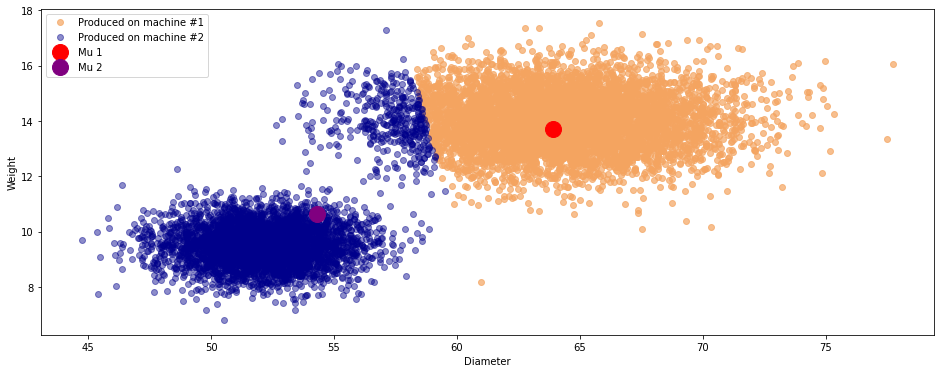

Итерация № 2
Матрица значений математических ожиданий
[[64.79317542 13.85436353]
 [53.20972507 10.42223327]]
Матрица значений стандартных отклонений
[[[2.98814467 0.95984399]
  [0.92543152 1.18637887]]

 [[3.11967901 2.2528287 ]
  [2.17205995 2.03222208]]]
Доля правильно распознанных изделий
0.904


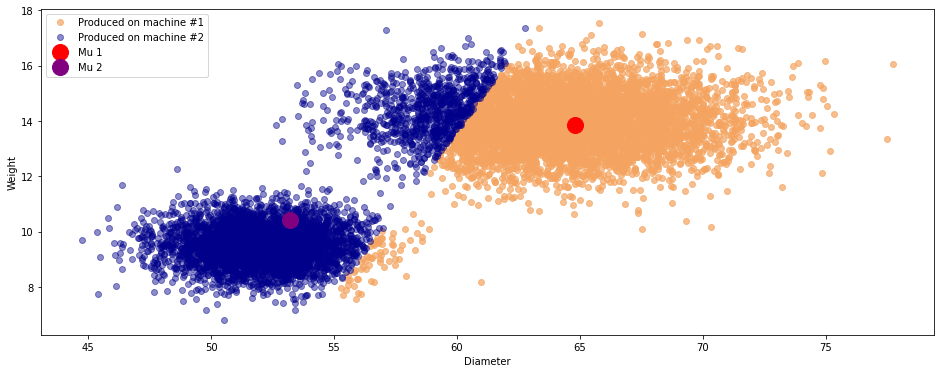

Итерация № 3
Матрица значений математических ожиданий
[[64.58696056 13.89316715]
 [52.78111595 10.17567581]]
Матрица значений стандартных отклонений
[[[3.05055127 0.8660694 ]
  [0.79166196 1.21696624]]

 [[2.54754626 1.8683287 ]
  [1.70781321 1.81959581]]]
Доля правильно распознанных изделий
0.934


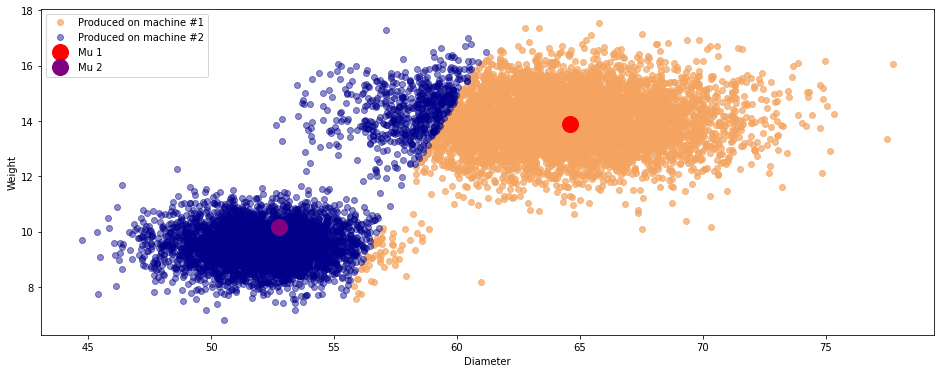

Итерация № 4
Матрица значений математических ожиданий
[[64.43716647 13.92367614]
 [52.5161524   9.99267629]]
Матрица значений стандартных отклонений
[[[3.12076441 0.75067557]
  [0.66302734 1.23666899]]

 [[2.19779323 1.53353976]
  [1.35448499 1.60858773]]]
Доля правильно распознанных изделий
0.952


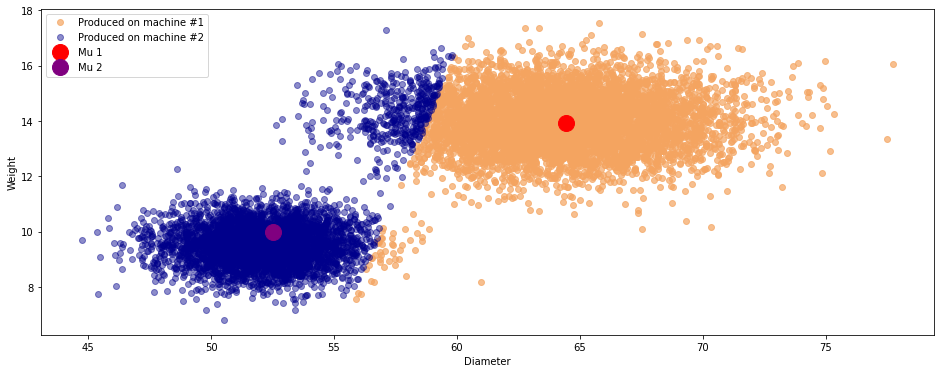

Итерация № 5
Матрица значений математических ожиданий
[[64.32546797 13.95134803]
 [52.33717351  9.84691052]]
Матрица значений стандартных отклонений
[[[3.18227766 0.58521931]
  [0.50463248 1.23656078]]

 [[1.96265428 1.21815611]
  [1.05041159 1.39992582]]]
Доля правильно распознанных изделий
0.969


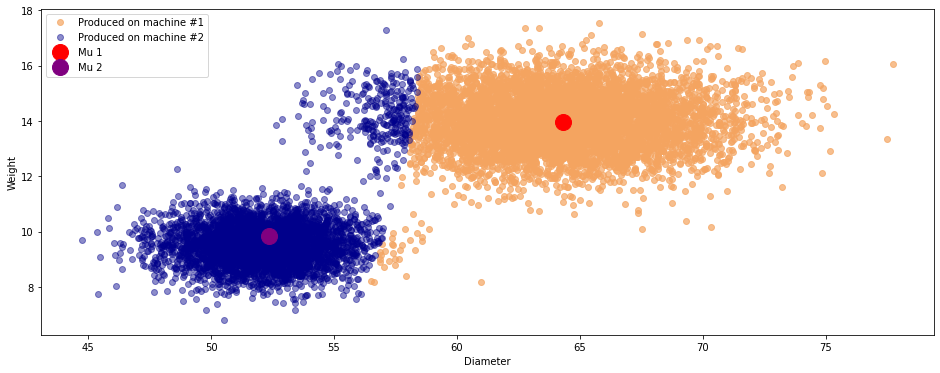

Итерация № 6
Матрица значений математических ожиданий
[[64.23752618 13.97057912]
 [52.22377274  9.73945807]]
Матрица значений стандартных отклонений
[[[3.24423649 0.40621016]
  [0.34441811 1.23112833]]

 [[1.82101311 0.94929294]
  [0.804888   1.21605867]]]
Доля правильно распознанных изделий
0.978


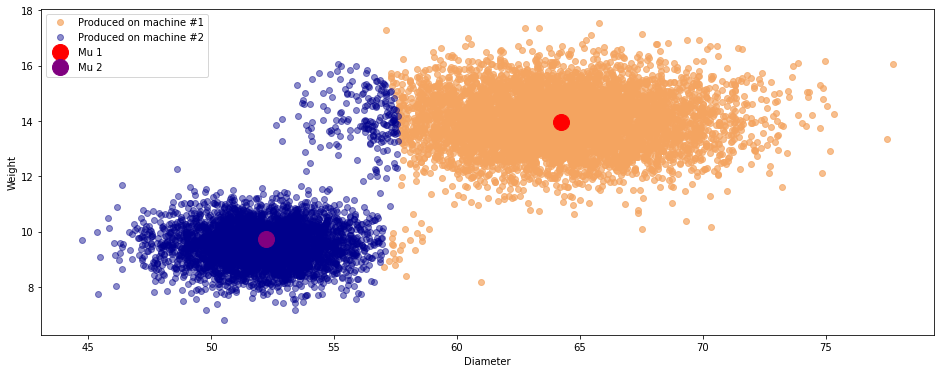

Итерация № 7
Матрица значений математических ожиданий
[[64.15703148 13.9834129 ]
 [52.14512594  9.6528895 ]]
Матрица значений стандартных отклонений
[[[3.31363261 0.18579895]
  [0.15539624 1.23102084]]

 [[1.73209598 0.70014885]
  [0.58558189 1.03711866]]]
Доля правильно распознанных изделий
0.986


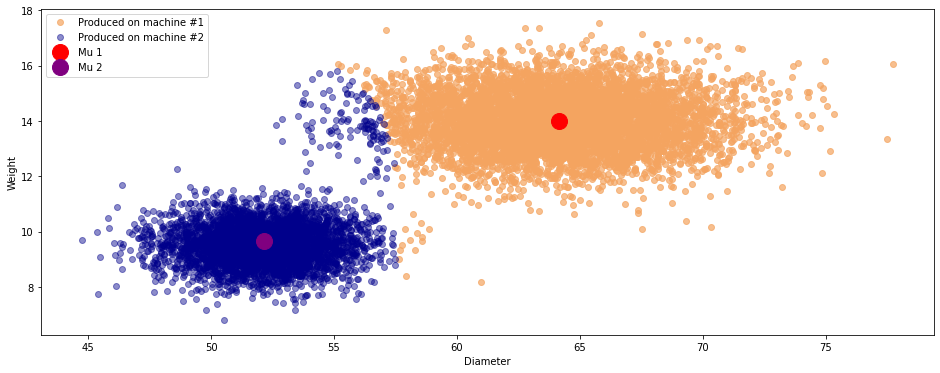

Итерация № 8
Матрица значений математических ожиданий
[[64.0959893  13.99065862]
 [52.09856568  9.59348642]]
Матрица значений стандартных отклонений
[[[3.37301879 0.        ]
  [0.         1.22988364]]

 [[1.6849299  0.49442379]
  [0.40961166 0.89498974]]]
Доля правильно распознанных изделий
0.992


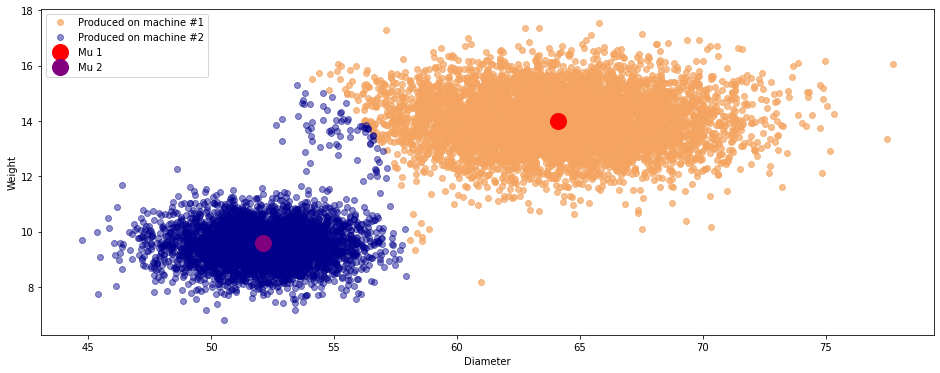

Итерация № 9
Матрица значений математических ожиданий
[[64.06086339 13.99253737]
 [52.07604212  9.56351424]]
Матрица значений стандартных отклонений
[[[3.40941831 0.        ]
  [0.         1.22949789]]

 [[1.66392993 0.36496053]
  [0.30079065 0.8193782 ]]]
Доля правильно распознанных изделий
0.995


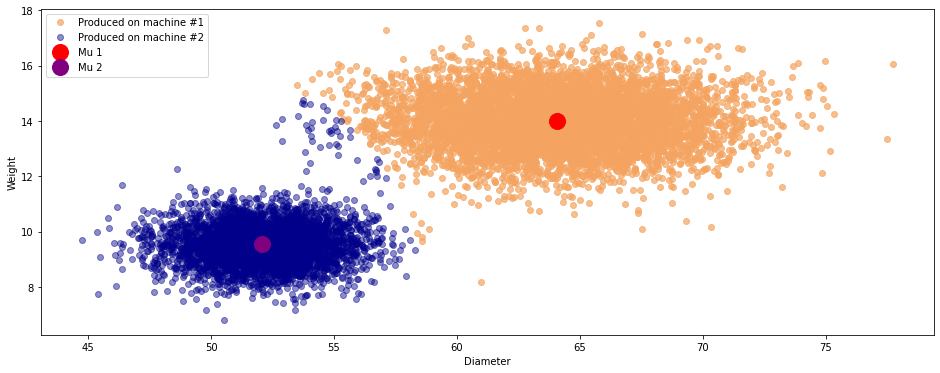

KeyboardInterrupt: 

In [23]:
# сформируем исходные условия
# количество изделий произведенных на станке №1 (кластер 1)
N1 = 6000
# количество изделий произведенных на станке №2 (кластер 2)
N2 = 4000
# суммарное количество изделий произведенных на обоих станках
N = N1 + N2

# количество станков
k = 2

# диаметр изделий станка №1
mu_samples_1_1 = 64.
# вес изделий станка №1
mu_samples_1_2 = 14.

# диаметр изделий станка №2
mu_samples_2_1 = 52.
# вес изделий станка №2
mu_samples_2_2 = 9.5

# стандартное отклонение диаметров изделий станка №1
sigma_samples_1_1 = 3.5
# стандартное отклонение веса изделий станка №1
sigma_samples_1_2 = 1.

# стандартное отклонение диаметров изделий станка №2
sigma_samples_2_1 = 2.
# стандартное отклонение веса изделий станка №2
sigma_samples_2_2 = 0.7

X = np.zeros((N, 2))

np.random.seed(seed=42)
# инициализируем данные по деталям, произведенных на станке №1
X[:N1, 0] = np.random.normal(loc=mu_samples_1_1, scale=sigma_samples_1_1, size=N1)
X[:N1, 1] = np.random.normal(loc=mu_samples_1_2, scale=sigma_samples_1_2, size=N1)
# инициализируем данные по деталям, произведенных на станке №2
X[N1:N, 0] = np.random.normal(loc=mu_samples_2_1, scale=sigma_samples_2_1, size=N2)
X[N1:N, 1] = np.random.normal(loc=mu_samples_2_2, scale=sigma_samples_2_2, size=N2)

# зафиксируем количество признаков
m = X.shape[1]

# зафиксируем количество объектов
n = X.shape[0]

# зафиксируем правильные ответы для оценки качества алгоритма (в обучении не используется)
y = np.zeros((N))
y[:N1] = np.array((1))
y[N1:N] = np.array((2))

# инициализируем априорную вероятность извлечь изделие, произведенное на станке №1 и №2
w = np.array([float(1./k), float(1./k)])

np.random.seed(seed = None)
# инициализируем средние значения диаметра и веса изделий (запишем в формате матрицы)
mu  = np.array(
    (np.mean(X[np.random.choice(n, int(n/k))], axis = 0), np.mean(X[np.random.choice(n, int(n/k))], axis = 0)))
# mu = np.array(([mu_samples_1_1, mu_samples_1_2],[mu_samples_2_1, mu_samples_2_2]))

# инициализируем стандартные отклонения в диаметре и весе изделий (запишем в формате матрицы ковариации)
sigma = np.array(([1., 0.],[0., 1.], [1., 0.],[0., 1.]))
# sigma = np.array(([sigma_samples_1_1, 0.],[0., sigma_samples_1_2], [sigma_samples_2_1, 0.],[0., sigma_samples_2_2]))
sigma = sigma.reshape(k, m, m)

# выберем количество итераций EM-алгоритма
steps = 15
# запустим цикл EM-алгоритма
for i in range(steps):
    proba_xi = e_step(X, k, m, n, w, mu, sigma)
    w, mu, sigma = m_step(X, proba_xi,N)
    X1_new_ind, X2_new_ind, X_answers = x_new(proba_xi)
    print('Итерация №', i+1)
    print('Матрица значений математических ожиданий')
    print(mu)
    print('Матрица значений стандартных отклонений')
    print(sigma)
    print('Доля правильно распознанных изделий')
    print(round(accuracy_score(y, X_answers),3))
    
    plt.figure(figsize=(16, 6))  
    plt.plot(
        X[X1_new_ind,0], X[X1_new_ind,1], 'o', alpha = 0.7, color='sandybrown', label = 'Produced on machine #1')
    plt.plot(
        X[X2_new_ind,0], X[X2_new_ind,1], 'o', alpha = 0.45, color = 'darkblue', label = 'Produced on machine #2')
    plt.plot(mu[0][0], mu[0][1], 'o', markersize = 16, color = 'red', label = 'Mu 1')
    plt.plot(mu[1][0], mu[1][1], 'o',  markersize = 16, color = 'purple', label = 'Mu 2')
    plt.xlabel('Diameter')
    plt.ylabel('Weight')
    plt.legend()
    plt.show()

### Реализация на sklearn

In [ ]:
from sklearn.mixture import GaussianMixture as GMM

# сформируем исходные условия
# количество изделий произведенных на станке №1 (кластер 1)
N1 = 6000
# количество изделий произведенных на станке №2 (кластер 2)
N2 = 4000
# суммарное количество изделий произведенных на обоих станках
N = N1 + N2

# диаметр изделий станка №1
mu_samples_1_1 = 64.
# вес изделий станка №1
mu_samples_1_2 = 14.

# диаметр изделий станка №2
mu_samples_2_1 = 52.
# вес изделий станка №2
mu_samples_2_2 = 9.5

# стандартное отклонение диаметров изделий станка №1
sigma_samples_1_1 = 3.5
# стандартное отклонение веса изделий станка №1
sigma_samples_1_2 = 1.

# стандартное отклонение диаметров изделий станка №2
sigma_samples_2_1 = 2.
# стандартное отклонение веса изделий станка №2
sigma_samples_2_2 = 0.7


# количество станков
k = 2

X = np.zeros((N, 2))

np.random.seed(seed=42)
# инициализируем данные по деталям, произведенных на станке №1
X[:N1, 0] = np.random.normal(loc=mu_samples_1_1, scale=sigma_samples_1_1, size=N1)
X[:N1, 1] = np.random.normal(loc=mu_samples_1_2, scale=sigma_samples_1_2, size=N1)
# инициализируем данные по деталям, произведенных на станке №2
X[N1:N, 0] = np.random.normal(loc=mu_samples_2_1, scale=sigma_samples_2_1, size=N2)
X[N1:N, 1] = np.random.normal(loc=mu_samples_2_2, scale=sigma_samples_2_2, size=N2)

# зафиксируем правильные ответы для оценки качества алгоритма (в обучении не используется)
y = np.zeros((N))
y[:N1] = np.array((1))
y[N1:N] = np.array((2))

np.random.seed(1)
model = GMM(n_components=k, covariance_type='full')
model.fit(X)


temp_predict_X = model.predict(X)
X_answers = []
for i in range(X.shape[0]):
    if temp_predict_X[i] == 0:
        X_answers.append(1)
    else:
        X_answers.append(2)
        

print(round(accuracy_score(y, X_answers),3))

1.0
